In [355]:
import json
import pandas as pd
import os


def get_result_for_file(file_path) -> dict:
    with open(file_path) as f:
        json_config = json.load(f)
    return json_config["metadata"]["score"]


def get_results(folder_path: str) -> pd.DataFrame:
    data = []

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        results = get_result_for_file(file_path)

        nb_nodes = filename.split("_")[0]

        try:
            spl = filename.split("_")
            spacing = int(spl[-1].split(".")[0])
        except:
            spacing = 6

        method = folder_path.split("/")[-1].split("_")[1]

        data.append(
            {
                "nb_nodes": int(nb_nodes),
                "spacing": int(spacing),
                "method": int(method),
                "score": results["total"],
                "gini_score": results["gini_score"],
                "sum_score": results["sum_score"],
                "normalized_score": results["total_normalized"],
                "normalized_sum": results["sum_normalized"],
            }
        )
    return pd.DataFrame(data)


data_10 = get_results("../data/registers/results/results_10_samples")
data_40 = get_results("../data/registers/results/results_40_samples")
data_100 = get_results("../data/registers/results/results_100_samples")
data_200 = get_results("../data/registers/results/results_200_samples")
data_500 = get_results("../data/registers/results/results_500_samples")

data = pd.concat([data_10, data_40, data_100, data_200, data_500], ignore_index=True)

In [356]:
ml_data = get_results("../data/registers/results/results_0_samples")

total_data = pd.concat([data, ml_data], ignore_index=True)

In [357]:
import sys

sys.path.append("../")
sys.path.append("../src")

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [358]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_experiment_results(
    results,
    x: str,
    y: str,
    hue: str,
    sort_by: list[str],
    title: str = "",
    x_label="",
    y_label="",
    norm=False,
    save_path=None,
):
    results.sort_values(by=sort_by, inplace=True)

    sns.set(style="whitegrid")

    palette = sns.color_palette("husl", 6)
    hues = sorted(results["method"].unique(), reverse=True)

    labels = list(hues)
    if len(labels) > 5:
        labels[5] = "ML"

    plt.figure(figsize=(12, 8))
    _ = sns.pointplot(
        x=x,
        y=y,
        hue=hue,
        data=results,
        palette=palette,
        errorbar=None,
        hue_order=hues,
        legend=False,
    )
    if norm:
        plt.ylim(0, 1)

    plt.xlabel(x_label, fontsize=18)
    plt.ylabel(y_label, fontsize=18)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    plt.title(title, fontdict=dict(font=dict(size=22)))

    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), labels=labels)

    if save_path:
        plt.savefig(save_path, transparent=True)

    plt.show()

/var/folders/fd/4p_2lkwj3tl9hf73ppy4cw100000gn/T/ipykernel_56112/3153785570.py:29: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  _ = sns.pointplot(


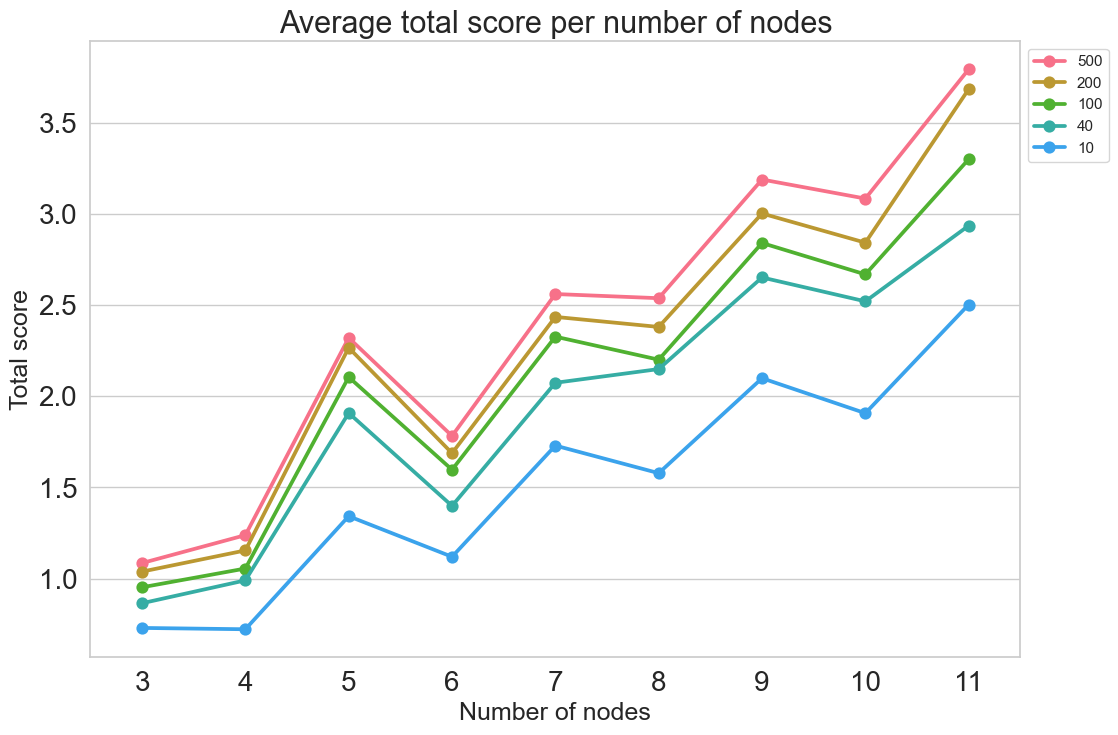

/var/folders/fd/4p_2lkwj3tl9hf73ppy4cw100000gn/T/ipykernel_56112/3153785570.py:29: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  _ = sns.pointplot(


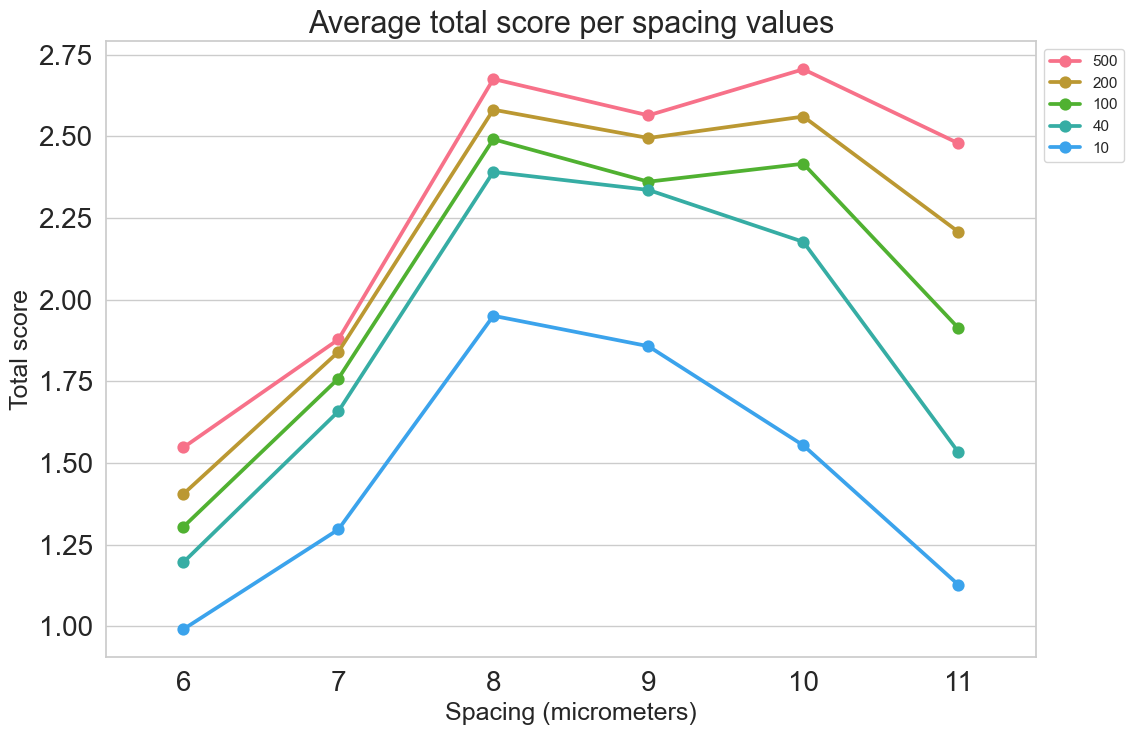

In [359]:
plot_experiment_results(
    data,
    x="nb_nodes",
    y="score",
    hue="method",
    sort_by=["nb_nodes", "method"],
    title="Average total score per number of nodes",
    x_label="Number of nodes",
    y_label="Total score",
    norm=False,
    save_path="../out/vqaa_score_nodes.pdf",
)

plot_experiment_results(
    data,
    x="spacing",
    y="score",
    hue="method",
    sort_by=["spacing", "method"],
    title="Average total score per spacing values",
    x_label="Spacing (micrometers)",
    y_label="Total score",
    norm=False,
    save_path="../out/vqaa_score_spacing.pdf",
)

/var/folders/fd/4p_2lkwj3tl9hf73ppy4cw100000gn/T/ipykernel_56112/3153785570.py:29: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  _ = sns.pointplot(


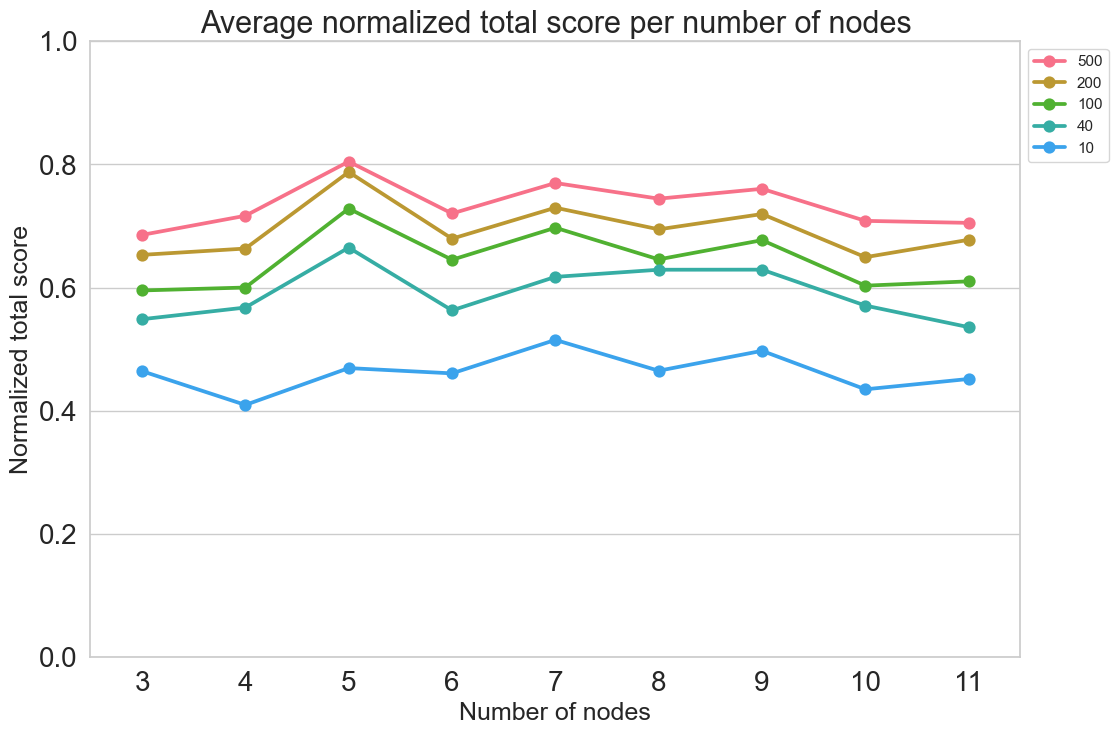

/var/folders/fd/4p_2lkwj3tl9hf73ppy4cw100000gn/T/ipykernel_56112/3153785570.py:29: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  _ = sns.pointplot(


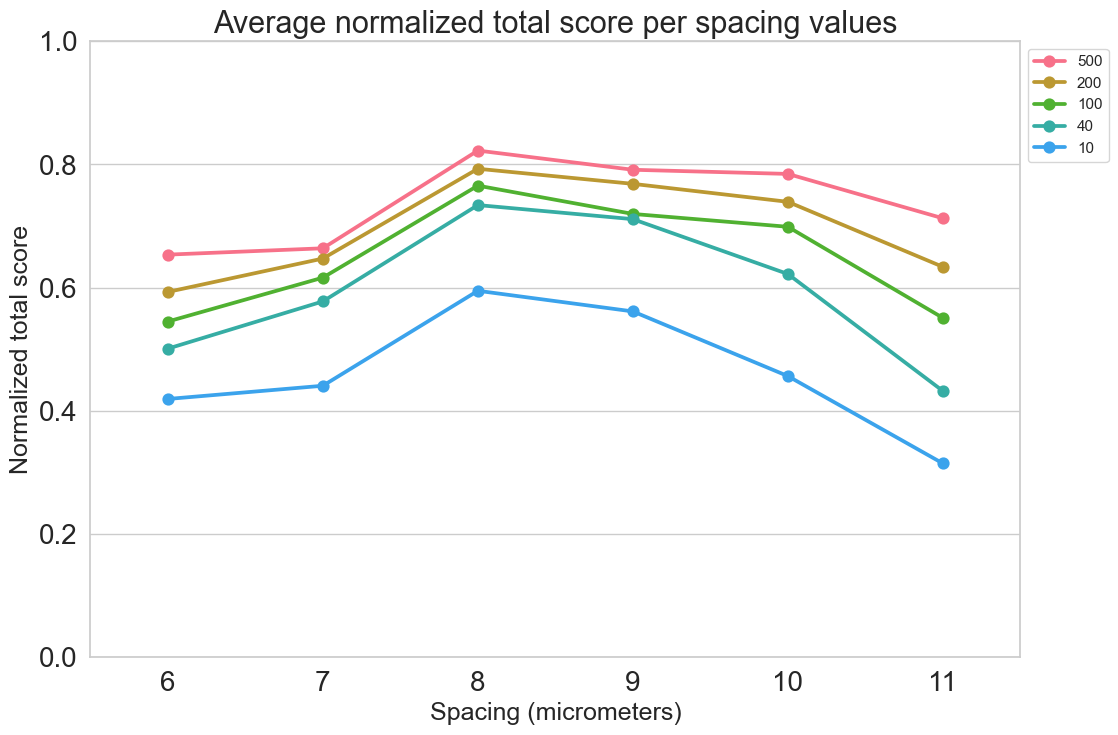

In [360]:
plot_experiment_results(
    data,
    x="nb_nodes",
    y="normalized_score",
    hue="method",
    sort_by=["nb_nodes", "method"],
    title="Average normalized total score per number of nodes",
    x_label="Number of nodes",
    y_label="Normalized total score",
    norm=True,
    save_path="../out/vqaa_norm_score_nodes.pdf",
)

plot_experiment_results(
    data,
    x="spacing",
    y="normalized_score",
    hue="method",
    sort_by=["spacing", "method"],
    title="Average normalized total score per spacing values",
    x_label="Spacing (micrometers)",
    y_label="Normalized total score",
    norm=True,
    save_path="../out/vqaa_norm_score_spacing.pdf",
)

/var/folders/fd/4p_2lkwj3tl9hf73ppy4cw100000gn/T/ipykernel_56112/3153785570.py:29: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  _ = sns.pointplot(


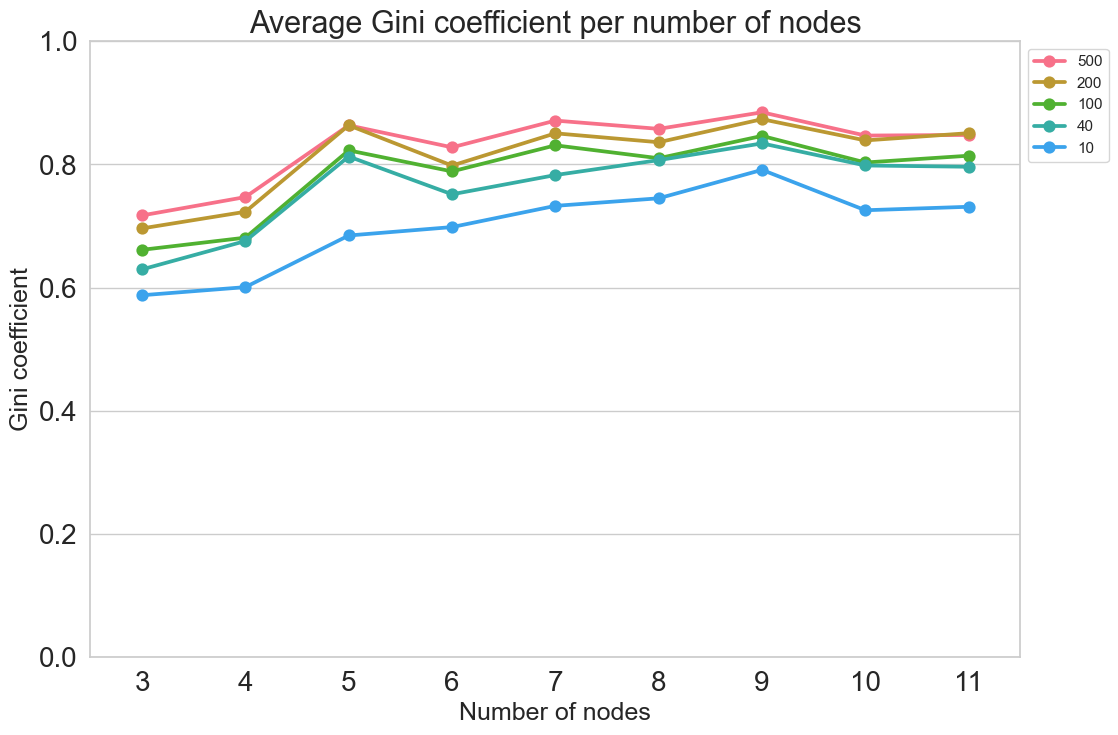

/var/folders/fd/4p_2lkwj3tl9hf73ppy4cw100000gn/T/ipykernel_56112/3153785570.py:29: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  _ = sns.pointplot(


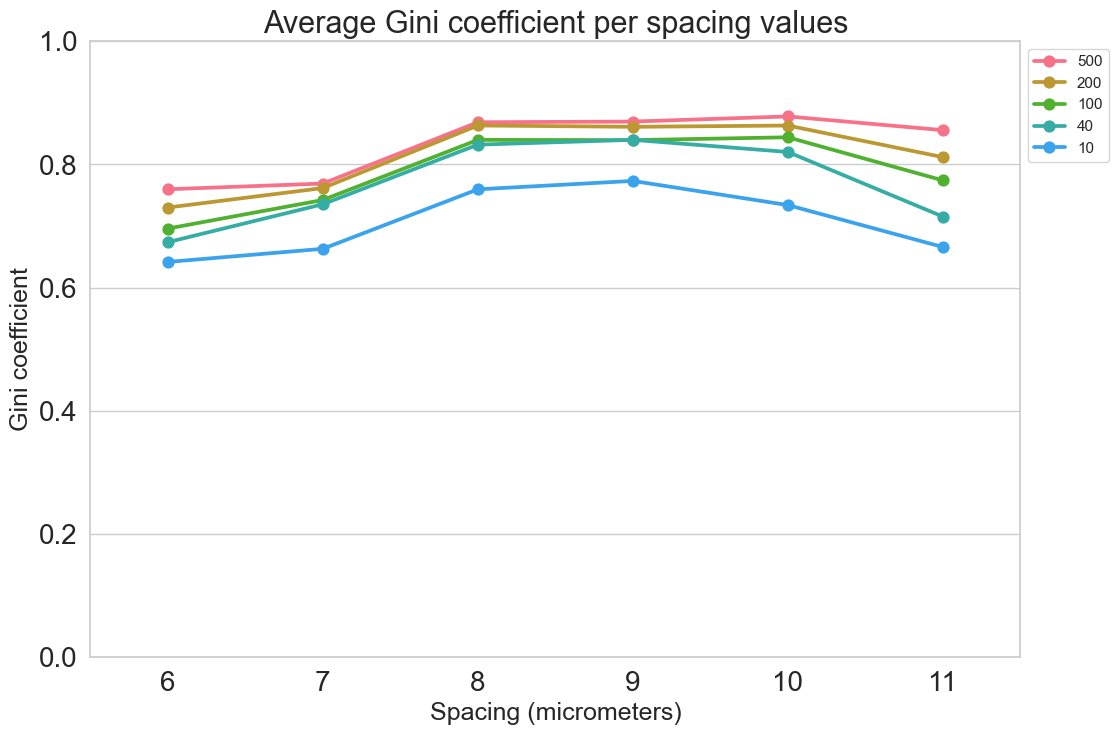

In [361]:
plot_experiment_results(
    data,
    x="nb_nodes",
    y="gini_score",
    hue="method",
    sort_by=["nb_nodes", "method"],
    title="Average Gini coefficient per number of nodes",
    x_label="Number of nodes",
    y_label="Gini coefficient",
    norm=True,
    save_path="../out/vqaa_gini_nodes.pdf",
)

plot_experiment_results(
    data,
    x="spacing",
    y="gini_score",
    hue="method",
    sort_by=["spacing", "method"],
    title="Average Gini coefficient per spacing values",
    x_label="Spacing (micrometers)",
    y_label="Gini coefficient",
    norm=True,
    save_path="../out/vqaa_gini_spacing.pdf",
)

/var/folders/fd/4p_2lkwj3tl9hf73ppy4cw100000gn/T/ipykernel_56112/3153785570.py:29: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  _ = sns.pointplot(


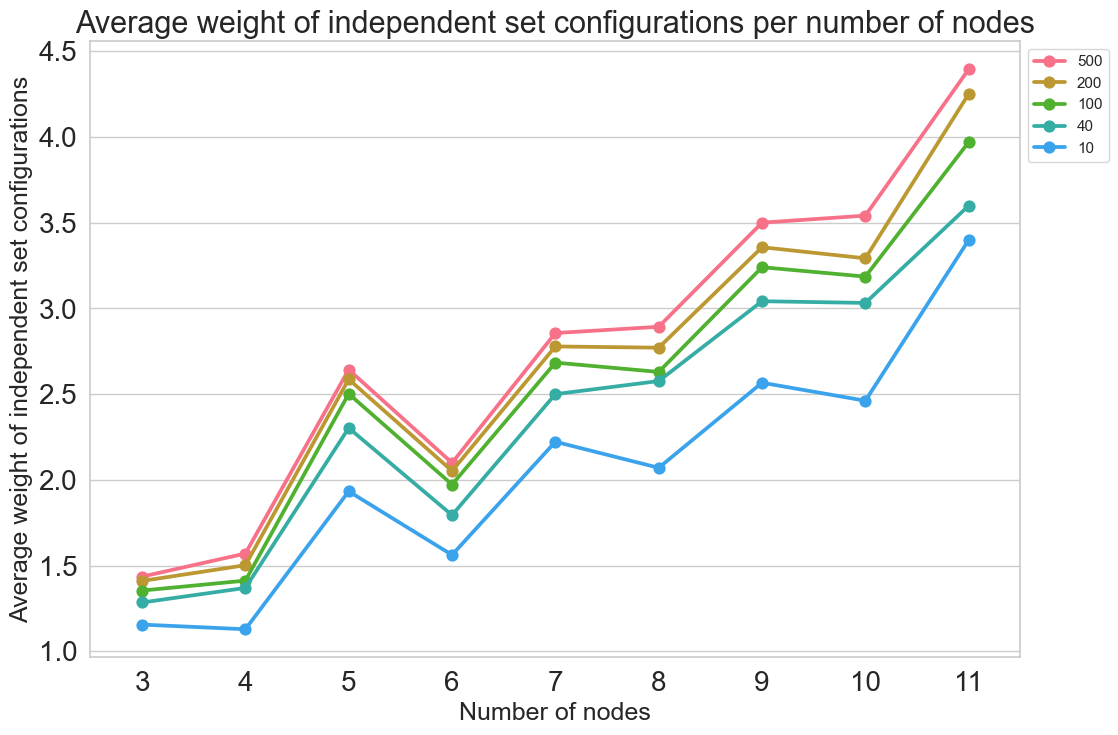

/var/folders/fd/4p_2lkwj3tl9hf73ppy4cw100000gn/T/ipykernel_56112/3153785570.py:29: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  _ = sns.pointplot(


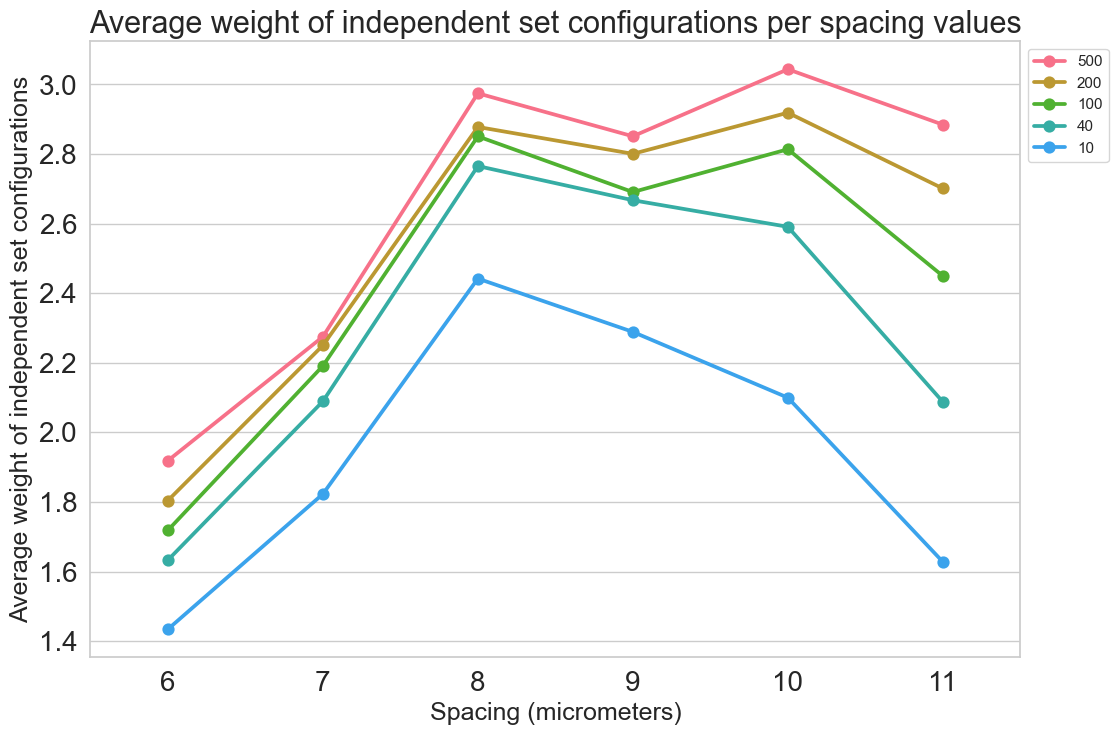

In [362]:
plot_experiment_results(
    data,
    x="nb_nodes",
    y="sum_score",
    hue="method",
    sort_by=["nb_nodes", "method"],
    title="Average weight of independent set configurations per number of nodes",
    x_label="Number of nodes",
    y_label="Average weight of independent set configurations",
    norm=False,
    save_path="../out/vqaa_sum_nodes.pdf",
)

plot_experiment_results(
    data,
    x="spacing",
    y="sum_score",
    hue="method",
    sort_by=["spacing", "method"],
    title="Average weight of independent set configurations per spacing values",
    x_label="Spacing (micrometers)",
    y_label="Average weight of independent set configurations",
    norm=False,
    save_path="../out/vqaa_sum_spacing.pdf",
)

/var/folders/fd/4p_2lkwj3tl9hf73ppy4cw100000gn/T/ipykernel_56112/3153785570.py:29: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  _ = sns.pointplot(


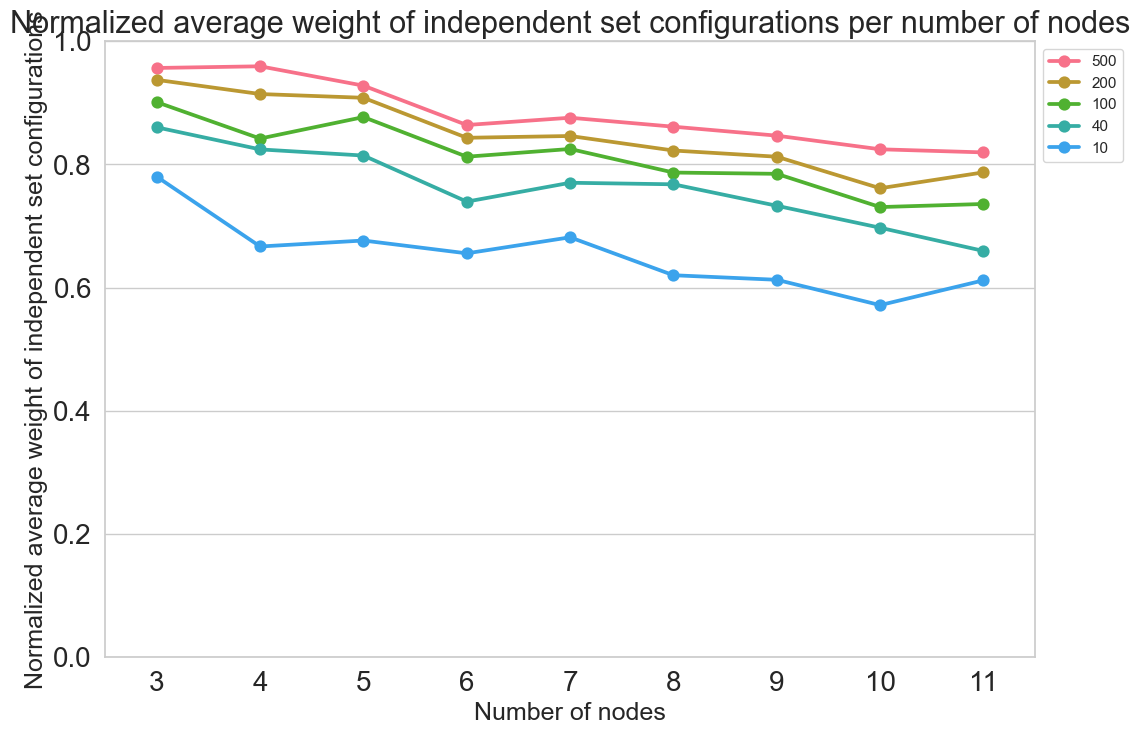

/var/folders/fd/4p_2lkwj3tl9hf73ppy4cw100000gn/T/ipykernel_56112/3153785570.py:29: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  _ = sns.pointplot(


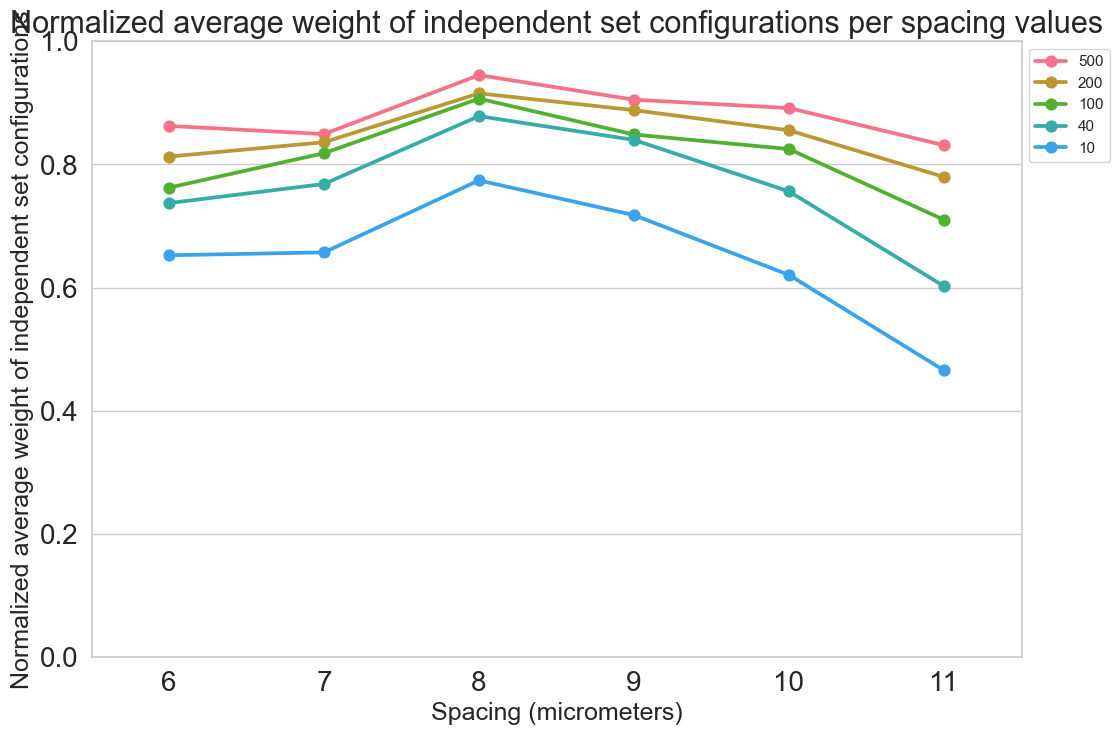

In [363]:
plot_experiment_results(
    data,
    x="nb_nodes",
    y="normalized_sum",
    hue="method",
    sort_by=["nb_nodes", "method"],
    title="Normalized average weight of independent set configurations per number of nodes",
    x_label="Number of nodes",
    y_label="Normalized average weight of independent set configurations",
    norm=True,
    save_path="../out/vqaa_norm_sum_nodes.pdf",
)

plot_experiment_results(
    data,
    x="spacing",
    y="normalized_sum",
    hue="method",
    sort_by=["spacing", "method"],
    title="Normalized average weight of independent set configurations per spacing values",
    x_label="Spacing (micrometers)",
    y_label="Normalized average weight of independent set configurations",
    norm=True,
    save_path="../out/vqaa_norm_sum_spacing.pdf",
)

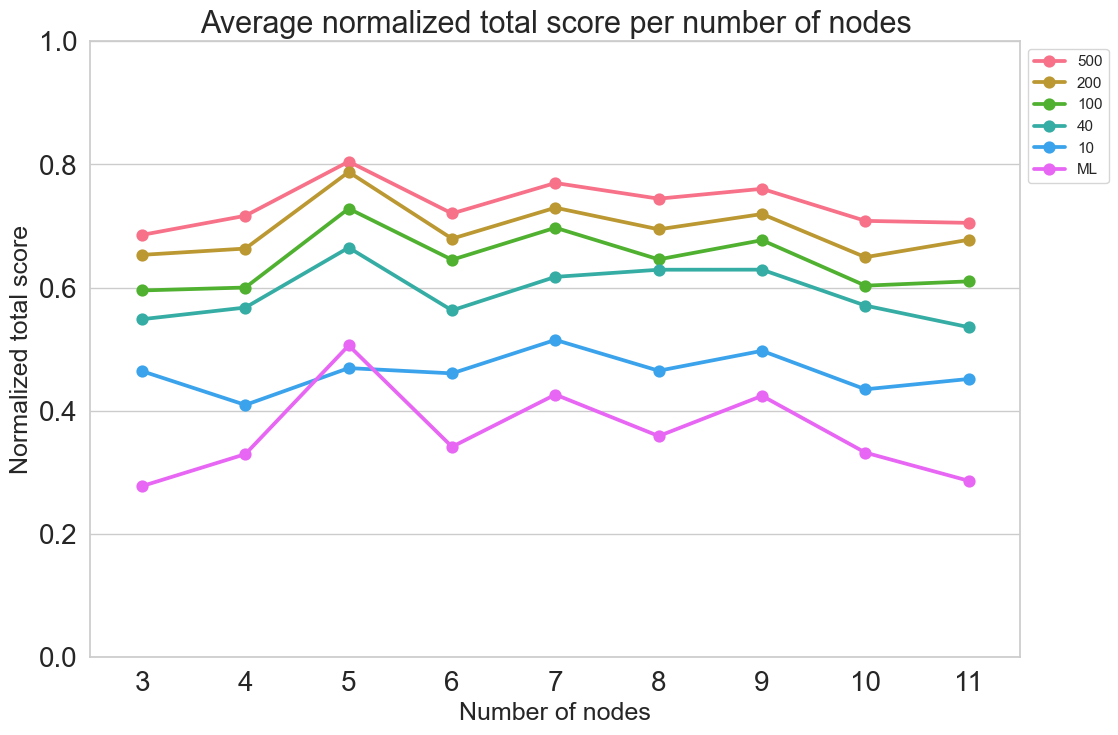

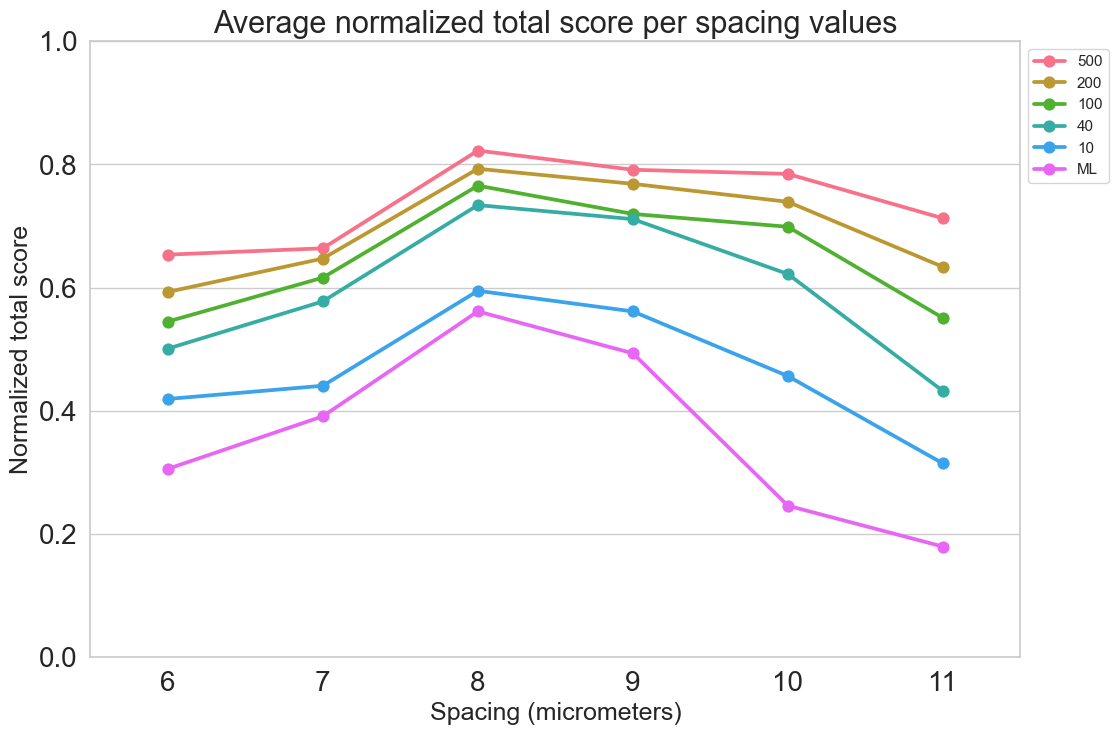

In [364]:
plot_experiment_results(
    total_data,
    x="nb_nodes",
    y="normalized_score",
    hue="method",
    sort_by=["nb_nodes", "method"],
    title="Average normalized total score per number of nodes",
    x_label="Number of nodes",
    y_label="Normalized total score",
    norm=True,
    save_path="../out/ml_norm_score_nodes.pdf",
)

plot_experiment_results(
    total_data,
    x="spacing",
    y="normalized_score",
    hue="method",
    sort_by=["spacing", "method"],
    title="Average normalized total score per spacing values",
    x_label="Spacing (micrometers)",
    y_label="Normalized total score",
    norm=True,
    save_path="../out/ml_norm_score_spacing.pdf",
)

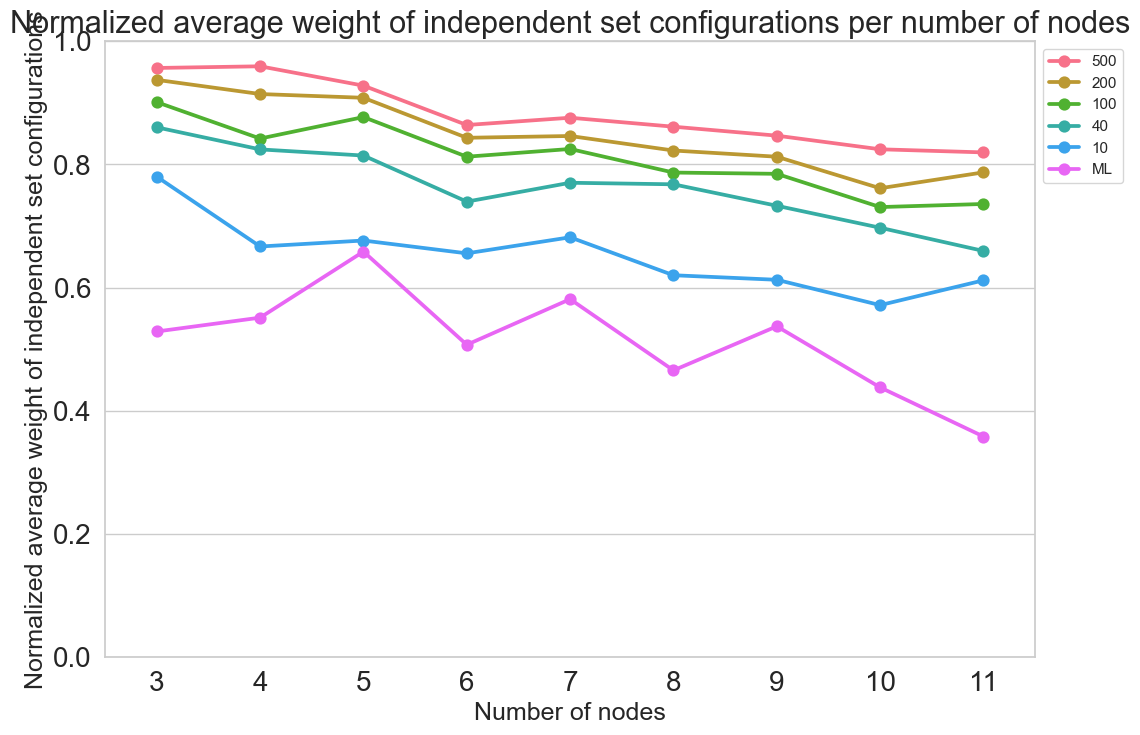

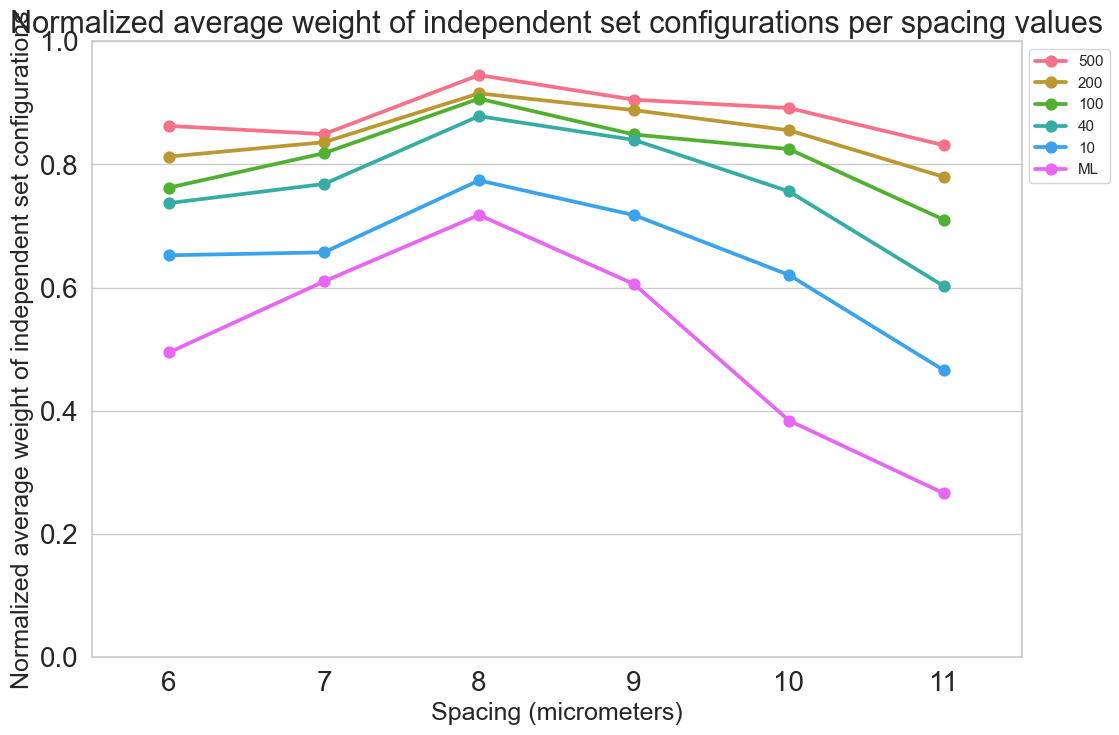

In [365]:
plot_experiment_results(
    total_data,
    x="nb_nodes",
    y="normalized_sum",
    hue="method",
    sort_by=["nb_nodes", "method"],
    title="Normalized average weight of independent set configurations per number of nodes",
    x_label="Number of nodes",
    y_label="Normalized average weight of independent set configurations",
    norm=True,
    save_path="../out/ml_norm_sum_nodes.pdf",
)

plot_experiment_results(
    total_data,
    x="spacing",
    y="normalized_sum",
    hue="method",
    sort_by=["spacing", "method"],
    title="Normalized average weight of independent set configurations per spacing values",
    x_label="Spacing (micrometers)",
    y_label="Normalized average weight of independent set configurations",
    norm=True,
    save_path="../out/ml_norm_sum_spacing.pdf",
)

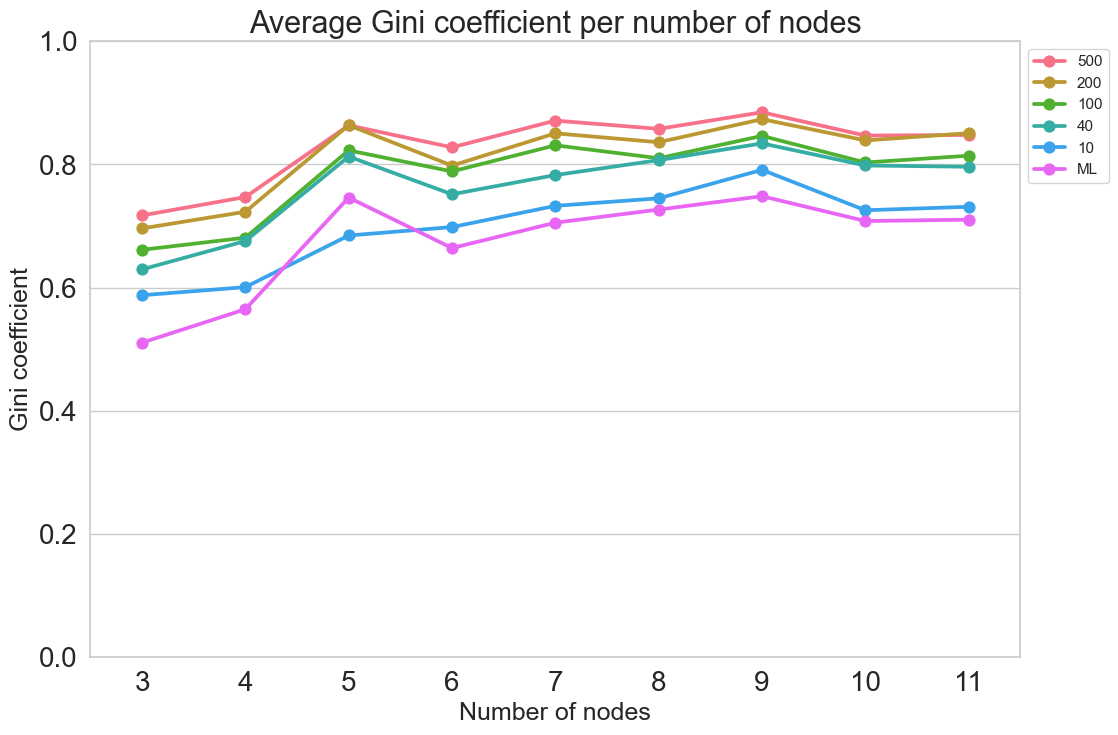

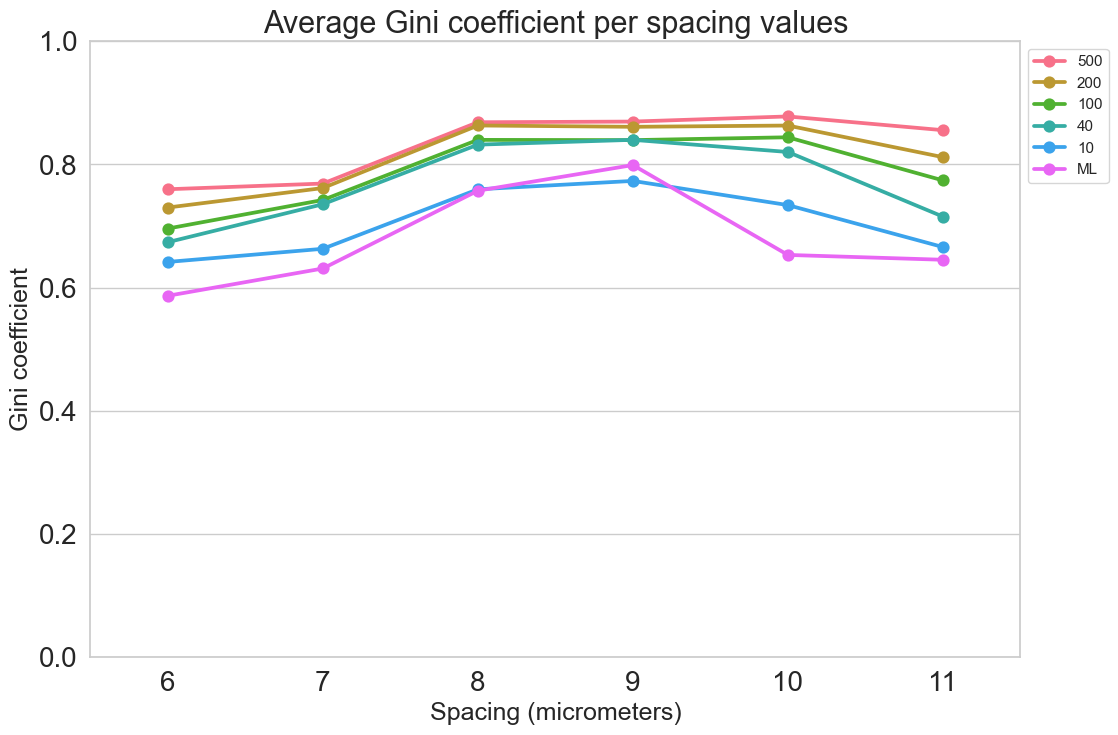

In [366]:
plot_experiment_results(
    total_data,
    x="nb_nodes",
    y="gini_score",
    hue="method",
    sort_by=["nb_nodes", "method"],
    title="Average Gini coefficient per number of nodes",
    x_label="Number of nodes",
    y_label="Gini coefficient",
    norm=True,
    save_path="../out/ml_gini_nodes.pdf",
)

plot_experiment_results(
    total_data,
    x="spacing",
    y="gini_score",
    hue="method",
    sort_by=["spacing", "method"],
    title="Average Gini coefficient per spacing values",
    x_label="Spacing (micrometers)",
    y_label="Gini coefficient",
    norm=True,
    save_path="../out/ml_gini_spacing.pdf",
)

In [367]:
from src.solver.utils.graph_register import GraphRegister
from src.solver.classical import get_mis


def get_file(file_path) -> dict:
    with open(file_path) as f:
        json_config = json.load(f)
    return json_config


def set_edges(folder_path: str) -> None:
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        register = GraphRegister.from_json(file_path)

        graph = register.graph
        edges = graph.edges
        mis = get_mis(graph)

        file_dict = get_file(file_path)
        file_dict["edges"] = [e for e in edges]
        file_dict["metadata"]["mis"] = mis
        file_dict["metadata"]["mis_size"] = len(mis[0])

        with open(file_path, mode="w") as f:
            f.write(json.dumps(file_dict, indent=4))


# set_edges("../data/registers/results/results_0_samples")

In [368]:
def set_normalized_scores(folder_path: str) -> None:
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        file_dict = get_file(file_path)

        score = file_dict["metadata"]["score"]
        mis_size = file_dict["metadata"]["mis_size"]

        new_total = score["total"] / mis_size
        new_sum_score = score["sum_score"] / mis_size

        file_dict["metadata"]["score"]["total_normalized"] = new_total
        file_dict["metadata"]["score"]["sum_normalized"] = new_sum_score

        with open(file_path, mode="w") as f:
            f.write(json.dumps(file_dict, indent=4))


# set_normalized_scores("../data/registers/results/results_0_samples")

{1: (0, 0), 2: (1, 5), 3: (2, 0)}


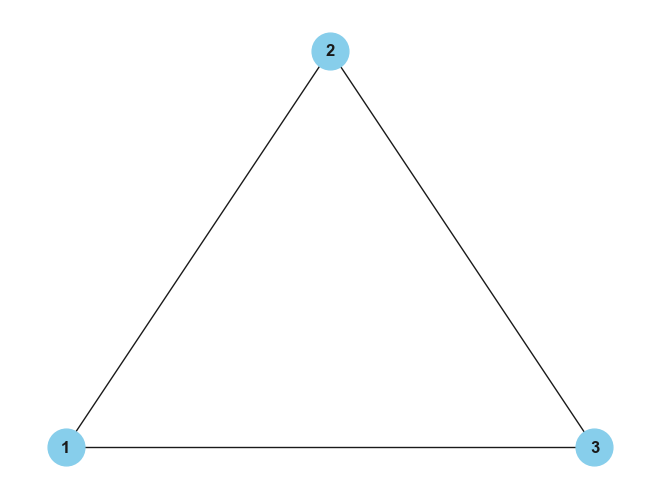

In [369]:
import networkx as nx
import matplotlib.pyplot as plt

# Exemple de positions de nœuds et d'arêtes
node_positions = {1: (0, 0), 2: (1, 5), 3: (2, 0)}
edges = [(1, 2), (2, 3), (3, 1)]

# Créer un graphe NetworkX, ajouter des nœuds avec les positions et des arêtes
G = nx.Graph()
G.add_nodes_from(node_positions)
nx.set_node_attributes(G, node_positions, "pos")
G.add_edges_from(edges)

# Visualiser le graphe (optionnel)
pos = nx.get_node_attributes(G, "pos")
print(pos)
nx.draw(G, pos, with_labels=True, font_weight="bold", node_size=700, node_color="skyblue")
plt.show()